
Today’s goal is to load the dataset and understand the column structure and data types.



In [7]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['ds_salaries (7).csv']))
print(df.shape)
df.info()

Saving ds_salaries.csv to ds_salaries (7).csv
(3755, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


1. Import Libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


2. Understand the Data

In [10]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.columns

df.info()
df.isnull().sum()


Rows: 3755, Columns: 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


 3. Explore Key Features

job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Applied Scientist              58
Data Science Manager           58
Research Engineer              37
Name: count, dtype: int64


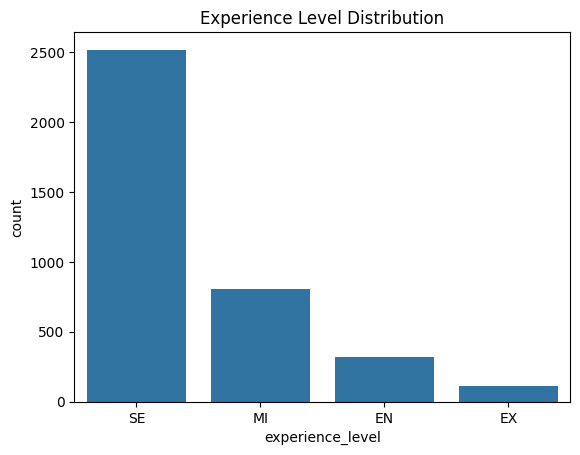

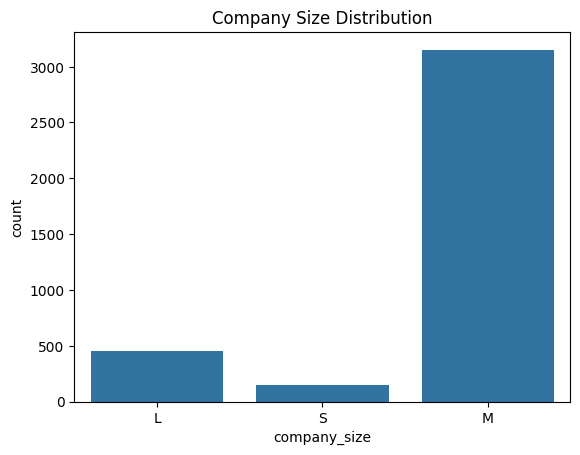

In [11]:
print(df['job_title'].value_counts().head(10))

sns.countplot(data=df, x='experience_level')
plt.title("Experience Level Distribution")
plt.show()

sns.countplot(data=df, x='company_size')
plt.title("Company Size Distribution")
plt.show()


4. Clean the Data

In [12]:
df.drop(columns=['salary_currency'], inplace=True)

df.rename(columns={'remote_ratio': 'remote_work_ratio'}, inplace=True)


5. Visualize Salary Distribution


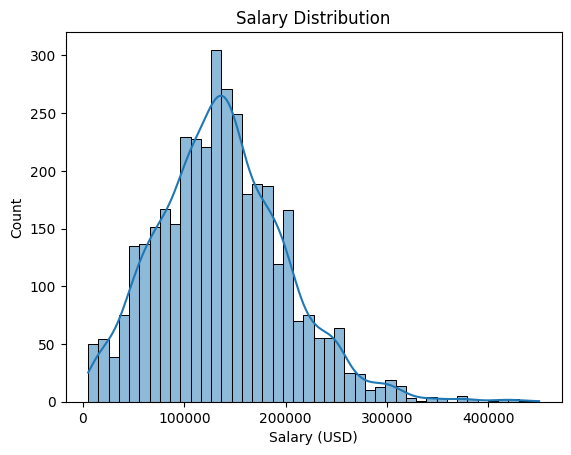

In [13]:
sns.histplot(df['salary_in_usd'], kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary (USD)')
plt.show()


6. Correlation Analysis

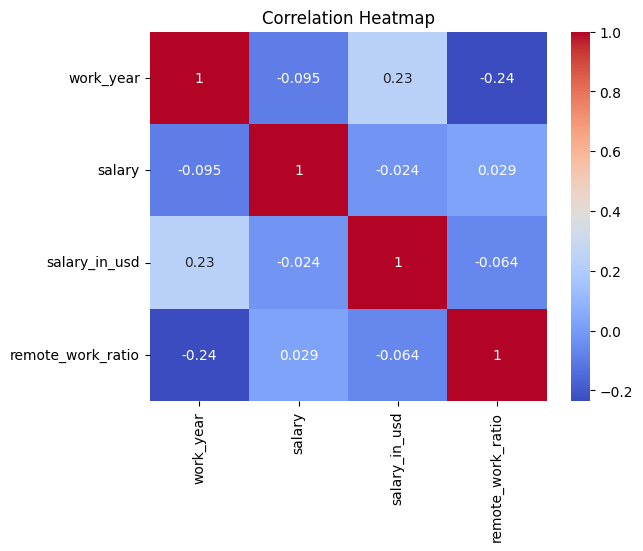

In [14]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
